In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:

import keras


In [27]:
import tensorflow as tf
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow.keras as tf_keras # type: ignore
from tensorflow.keras.utils import image_dataset_from_directory # type: ignore
from tensorflow.keras.applications import EfficientNetV2S # type: ignore
from tensorflow.keras.applications.efficientnet import preprocess_input  # type: ignore
import os

In [34]:
train_dir = './dataset/Train'
val_dir = './dataset/validate'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(224, 224),
    seed=123,
    shuffle=True,
)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(224, 224),
    seed=42,
)

Found 4004 files belonging to 4 classes.
Using 3204 files for training.
Found 4004 files belonging to 4 classes.
Using 800 files for validation.


In [35]:
image = preprocess_input(train_dir)
print(image )



./dataset/Train


In [36]:
class_names = sorted(os.listdir(train_dir))

print("Class Names:", class_names)
num_classes = len(class_names)
print("Number of Classes:", num_classes)

Class Names: ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
Number of Classes: 4


In [37]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [38]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.5)
])

In [39]:
# train_ds

In [40]:
# Input_shape = [224,224,3]

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
base_model.trainable = False

# base_model = tf.keras.applications.EfficientNetV2S(
#     include_top=False,
#     weights='imagenet',
#     input_shape=(256, 256, 3)
# )

In [46]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 classes
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
101/101 [==============================] - 126s 1s/step - loss: 0.6888 - accuracy: 0.7322 - val_loss: 0.4124 - val_accuracy: 0.8637
Epoch 2/10
101/101 [==============================] - 114s 1s/step - loss: 0.4921 - accuracy: 0.8187 - val_loss: 0.3812 - val_accuracy: 0.8662
Epoch 3/10
101/101 [==============================] - 120s 1s/step - loss: 0.4358 - accuracy: 0.8365 - val_loss: 0.3367 - val_accuracy: 0.8763
Epoch 4/10
101/101 [==============================] - 128s 1s/step - loss: 0.3962 - accuracy: 0.8555 - val_loss: 0.2976 - val_accuracy: 0.8888
Epoch 5/10
101/101 [==============================] - 128s 1s/step - loss: 0.3829 - accuracy: 0.8546 - val_loss: 0.3012 - val_accuracy: 0.8900
Epoch 6/10
101/101 [==============================] - 128s 1s/step - loss: 0.3684 - accuracy: 0.8614 - val_loss: 0.2669 - val_accuracy: 0.8963
Epoch 7/10
101/101 [==============================] - 129s 1s/step - loss: 0.3523 - accuracy: 0.8689 - val_loss: 0.2788 - val_accuracy: 0.8938

In [48]:
# preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

# base_model.trainable = False

In [49]:
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# prediction_layer = tf.keras.layers.Dense(num_classes)

In [50]:
# inputs = tf.keras.Input(shape=(256, 256, 3))
# x = data_augmentation(inputs)
# x = preprocess_input(x)
# x = base_model(x, training=False)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# outputs = prediction_layer(x)

# model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [51]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)

# model.compile(
#     optimizer=optimizer,
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_7 (Dense)             (None, 128)               163968    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 4)                 516       
                                                                 
Total params: 4214055 (16.08 MB)
Trainable params: 164

In [62]:
history.history

{'loss': [0.6888003945350647,
  0.4920504093170166,
  0.4357753098011017,
  0.39622071385383606,
  0.38292571902275085,
  0.36843690276145935,
  0.3522948920726776,
  0.3264276683330536,
  0.3282012641429901,
  0.302655965089798],
 'accuracy': [0.7322097420692444,
  0.8186641931533813,
  0.836454451084137,
  0.8554931282997131,
  0.8545567989349365,
  0.8614231944084167,
  0.8689138293266296,
  0.8792135119438171,
  0.8689138293266296,
  0.882022500038147],
 'val_loss': [0.412433922290802,
  0.38123610615730286,
  0.3366650640964508,
  0.2976207137107849,
  0.30117568373680115,
  0.26686975359916687,
  0.2788033187389374,
  0.24906565248966217,
  0.23675300180912018,
  0.24615328013896942],
 'val_accuracy': [0.8637499809265137,
  0.8662499785423279,
  0.8762500286102295,
  0.8887500166893005,
  0.8899999856948853,
  0.8962500095367432,
  0.893750011920929,
  0.9112499952316284,
  0.9137499928474426,
  0.9087499976158142]}

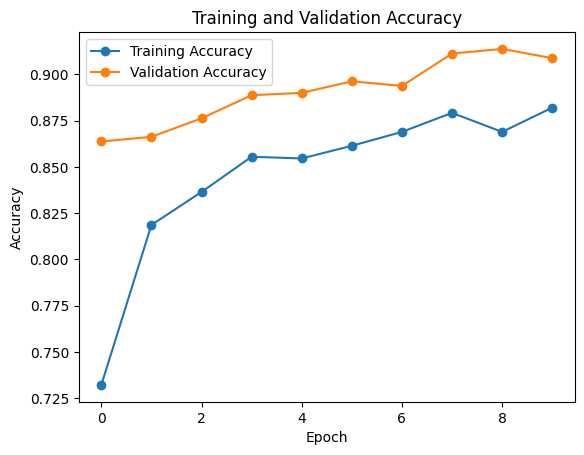

In [60]:
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [53]:
# from tensorflow.keras import  callbacks

In [54]:
# early_stopping = callbacks.EarlyStopping(patience=3)

# Training = model.fit(
#     train_ds,
#     epochs=15,
#     validation_data=val_ds,
#     callbacks=[early_stopping] 
# )

In [63]:
model.save("./Trained_model.h5")
model.save("./Trained_model.keras")

In [64]:
import pickle
with open("Training.pkl","wb")as f:
    pickle.dump(Training.history,f)

In [65]:
import pickle
with open("Training.pkl","rb")as f:
    load_history = pickle.load(f)
print(load_history)

{'loss': [9.571149826049805, 8.510287284851074, 9.771803855895996, 9.241914749145508], 'accuracy': [0.5062422156333923, 0.5137328505516052, 0.49968788027763367, 0.5093632936477661], 'val_loss': [8.99890422821045, 9.10329532623291, 18.03398895263672, 16.449159622192383], 'val_accuracy': [0.5024999976158142, 0.4637500047683716, 0.49000000953674316, 0.48249998688697815]}


In [ ]:
model = tf.keras.models.load_model("Trained_model.h5")